# Importing suitable Libraries and Data set 

In [20]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Read the Excel file
data = pd.read_excel("C:/Users/skbna/Downloads/1729258-1613615-Stock_Price_data_set_(1).xlsx")


# Checking the missing values 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Day          0
Month        0
Year         0
dtype: int64
                                Date         Open         High          Low   
count                           1009  1009.000000  1009.000000  1009.000000  \
mean   2020-02-05 07:30:58.870168320   419.059673   425.320703   412.374044   
min              2018-02-05 00:00:00   233.919998   250.649994   231.229996   
25%              2019-02-06 00:00:00   331.489990   336.299988   326.000000   
50%              2020-02-06 00:00:00   377.769989   383.010010   370.880005   
75%              2021-02-05 00:00:00   509.130005   515.630005   502.529999   
max              2022-02-04 00:00:00   692.349976   700.989990   686.090027   
std                              NaN   108.537532   109.262960   107.555867   

             Close    Adj Close        Volume          Day        Month   
count  1009.000000  1009.000000  1.009000e+03  100

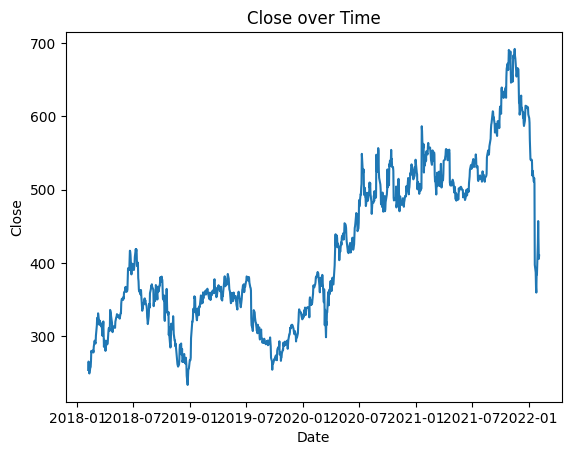

In [3]:


# Split date into day, month, and year
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize the closing price over time
import matplotlib.pyplot as plt

plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Close over Time')
plt.show()


In [4]:
print(data[data['Close'] == data['Adj Close']].shape)

(1009, 10)


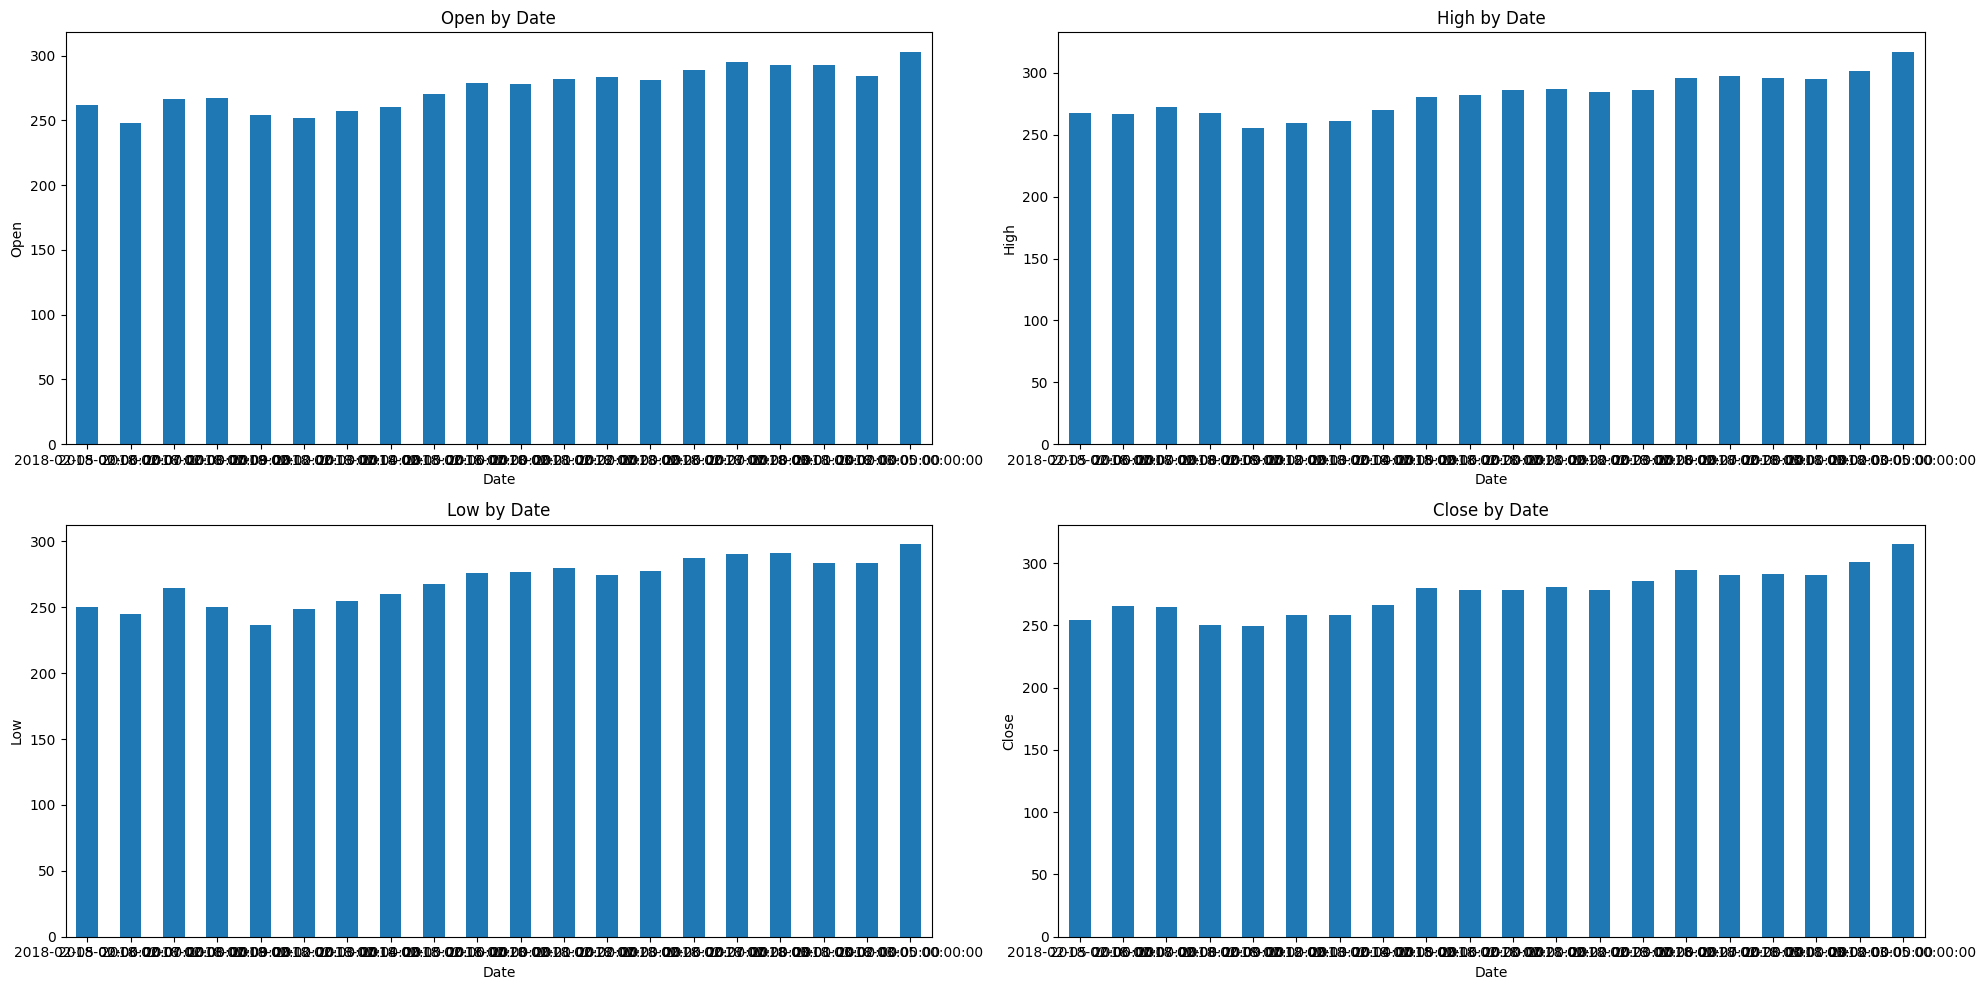

In [36]:

year_column = 'Date'

# Verify the column existence
if year_column not in data.columns:
    print(f"Error: '{year_column}' column not found in the DataFrame.")
else:
    # Group the data by year and calculate the mean
    data_grouped = data.groupby(year_column).mean()

    # Create the subplots
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))

    # Plot each column
    for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
        row = i // 2
        col_index = i % 2
        ax = axes[row, col_index]
        data_grouped[col].head(20).plot.bar(ax=ax, rot=0)  # Display only the first 6 bars
        ax.set_xlabel(year_column)
        ax.set_ylabel(col)
        ax.set_title(f'{col} by {year_column}')

    # Remove empty subplots
    fig.tight_layout()

    # Show the plot
    plt.show()


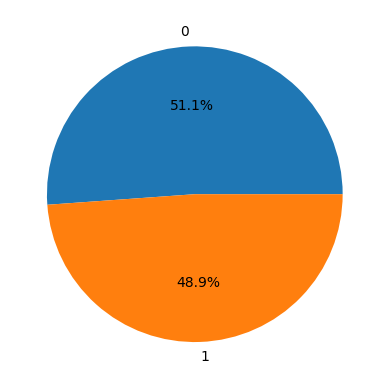

In [53]:


# Calculate additional columns
data['open-close'] = data['Open'] - data['Close']
data['low-high'] = data['Low'] - data['High']
data['target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Plot the pie chart
plt.pie(data['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()


# Making Predictions 

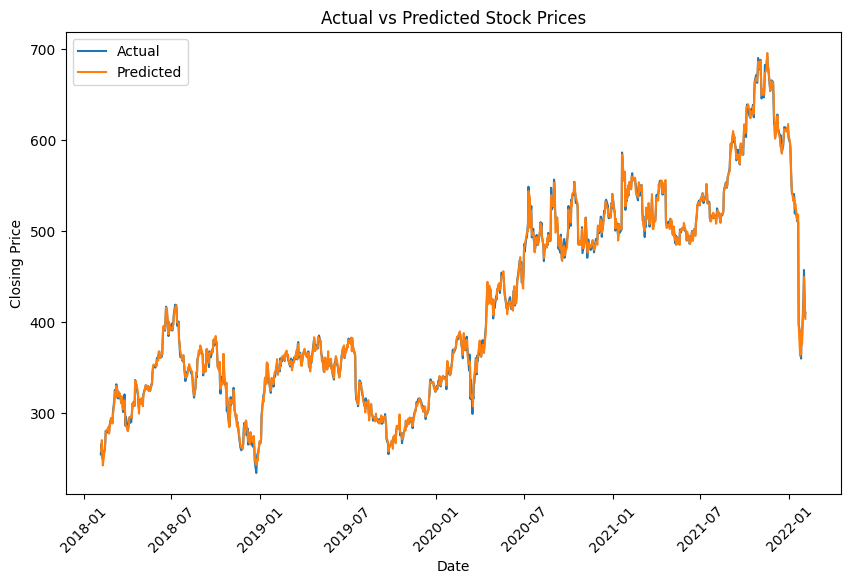

Root Mean Squared Error: 3.8807338548761954


In [54]:


# Make predictions on the entire dataset
y_pred = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(data['Date'].values[-len(y_pred):], data['Close'].values[-len(y_pred):], label='Actual')
plt.plot(data['Date'].values[-len(y_pred):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y[-len(y_pred):], y_pred, squared=False)
print("Root Mean Squared Error:", rmse)
